# TP03 Kernel methods

### NGUYEN Huy Dung - HUYNH Vu Hoi

In the course of $AOS1$, we learned about the performence of kernel methods and support vectors machine (SVM). Beside it, there are several methods improving the generalization performance, or improving the speed in test phase, of SVMs. All those methods try to make SVM becomes more powerful.

The paper by Burges and Schölkopf is investigating a method the improve the accuracy and speed of SVM. First train a SVM with the same dataset (MNIST) with the kernel and the hyperparameter C they are suggesting.

In this TP, we describe the technique they are using to improve the accuracy. Furthermore, we will try to implement it to see if it is working.

Reference: [Chris J.C. Burges and Bernhard Schölkopf. “Improving the Accuracy and Speed of Support Vector Machines”. In: Advances in Neural Information Processing Systems 9. MIT Press, 1997, pp. 375–381.](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.54.1171)

## I. Introduction

In the paper by Burges and Schölkopf, they showed that improving accuracy of SVM can be done by incorporating knowledge about invariances of the problem at hand. This method is applicable to any problem for which the data is symmetries. We will talk to the symmetries of data set later in this report.

There are 2 different ways to incorporate knowledge:
- By building directly into the algorithm
- By generating artificial training examples ("virtual exemples")

The second way significantly slows down training times because of correlations in the artificial data and also the increased training set size. But its advantage is that it is already usable for any learning machine and for any invariances. In addition, we will follow this way to improving the accuracy.

## II. Data set MNIST

First, we download the MNIST data base from this URL: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) Then extract it in the folder `./data/`.

There is 4 files in this dataset: Training images $X_{train}$, training labels $y_{train}$, test images $X_{test}$ and test labels $y_{test}$. We have the same data set and test set as in the paper by Burges and Schölkopf. So, we have 60000 samples in training set and 10000 samples in test set.

In [1]:
from mnist import MNIST


# Load dataset
mndata = MNIST('./data/')

images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()
print('Number of samples in training set :', len(images_train))
print('Number of samples in test set :', len(images_test))

Number of samples in training set : 60000
Number of samples in test set : 10000


In the description, each sample is a 28x28 image. So that a sample contain 784 feature.

In [2]:
print('Number of features in a sample :', len(images_test[0]))

Number of features in a sample : 784


Each sample is a sample of a number from 0 to 9. We can display it using `matplotlib.pyplot`

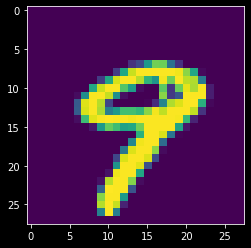

In [3]:
import numpy as np
import matplotlib.pyplot as plt


im = np.asarray(images_test[9]).reshape(28, 28)
plt.imshow(im)
plt.show()

## III. Process of improving accuracy

As we can see before, we will incorporate knowledge by generating artificial training examples ("virtual exemples"). To do that, the paper by Burges and Schölkopf suggest following the algorithm below:

1. Train an SVM to generate a set of support vectors {$s_{1}, ... , s_{N_{s}}$}
2. Generate the artificial examples (virtual support vectors) by applying the desired invariance transformations to {$s_{1}, ... , s_{N_{s}}$}
3. Train another SVM on the new set

### 1. Train an SVM to generate a set of support vectors {$s_{1}, ... , s_{N_{s}}$}

In this part,  we are suggesting training ten binary classifiers using $C=10$, $K(x, y) = (x.y)^{5}$ and `squared hinge` as loss function. However, squared hinge is only supported for Linear Support Vector Classification in Python. So, in this report, we will use the following configuration: $C=10$, $K(x, y) = (x.y)^{5}$ and `hinge` as loss function. At the end of this report, we expect to have a greater accuracy as the result of the paper by Burges and Schölkopf.

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import time


# First SVM
svc_1 = SVC(kernel='poly', gamma=1, degree=5, C=10)

time_training_ORIG_start = time.time()
svc_1.fit(images_train, labels_train)
time_training_ORIG_finish = time.time()

time_testing_ORIG_start = time.time()
labels_pred_1 = svc_1.predict(images_test)
time_testing_ORIG_finish = time.time()

print('Training time : ', time_training_ORIG_finish - time_training_ORIG_start)
print('Testing time : ', time_testing_ORIG_finish - time_testing_ORIG_start)

Training time :  436.5764012336731
Testing time :  74.63338327407837


We can display the confusion matrix as below. We observe that the max value of a column or a row is always in the diagonal line. So the prediction is pretty good.

In [5]:
print(confusion_matrix(labels_test.tolist(), labels_pred_1))

[[ 968    2    1    0    0    4    2    1    2    0]
 [   0 1120    2    2    1    0    6    0    4    0]
 [  10   13  984    2    2    1    5    8    6    1]
 [   1    9    4  976    0    6    0    6    5    3]
 [   3    9    3    0  951    0    5    1    1    9]
 [   5    6    1   13    1  847    6    1    9    3]
 [   6   14    1    0    2    4  929    0    2    0]
 [   1   16   10    2    2    0    0  989    0    8]
 [   9    5    1    5    3    9    0    3  937    2]
 [   6   10    0    6   16    3    0    5    6  957]]


Then, we display the classification report. The f1-score is pretty high and we can see also the number of SVMs of this original training (ORIG)

In [6]:
print(classification_report(labels_test.tolist(), labels_pred_1))

precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.93      0.99      0.96      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Finally, the accuracy is:

In [7]:
print(accuracy_score(labels_test.tolist(), labels_pred_1))

0.9658


### 2. Generate the artificial examples (virtual support vectors) by applying the desired invariance transformations to {$s_{1}, ... , s_{N_{s}}$}

In this part, we generate the new training data by translating the resulting support vectors by one pixel in each of four directions. To do this, first we define a function allowing to move our images up, down, to left or to right.

In [8]:
def translate(img, new_col, direction, pix) :
    """
    Input:  img        - 1D data of the image to move
            new_col    - number of columns of the image
            direction  - direction to move {'up', 'down', 'left', 'right'}
            pix        - number of pixels too move
            
    Output: 1D data of the image translated
    """
    
    length_img = len(img)
    new_img = np.asarray(img).reshape(-1, new_col)
    new_row = length_img // new_col
    
    if (direction == 'down') :
        transl_img = new_img[[*np.arange(new_row - pix, new_row),
                              *np.arange(0, new_row - pix)], : ]
    elif (direction == 'up') :
        transl_img = new_img[[*np.arange(pix, new_row),
                              *np.arange(0, pix)], : ]
    elif (direction == 'right') :
        transl_img = new_img[:, [*np.arange(new_col - pix, new_col),
                                 *np.arange(0, new_col - pix)]]
    elif (direction == 'left') :
        transl_img = new_img[:, [*np.arange(pix, new_col),
                                 *np.arange(0, pix)]]
    
    return transl_img.reshape(length_img, -1).ravel()

This is an exemple of translating a sample using our function.

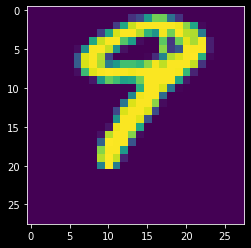

In [9]:
im2 = np.asarray(translate(images_test[9], new_col=28,
                           direction='up', pix=6)).reshape(28, 28)
plt.imshow(im2)
plt.show()

Using our function, we then define virtual support vectors as below:

In [10]:
new_training_set = []
labels = [labels_train[index] for index in svc_1.support_]
new_labels = []

for i_svm in range(len(svc_1.support_)):
    img = svc_1.support_vectors_[i_svm]  
    img1 = translate(img=img, new_col=28, direction='down', pix=1)
    img2 = translate(img=img, new_col=28, direction='up', pix=1)
    img3 = translate(img=img, new_col=28, direction='right', pix=1)
    img4 = translate(img=img, new_col=28, direction='left', pix=1)
    
    new_training_set = [*new_training_set, img1, img2, img3, img4]
    new_labels = [*new_labels, labels[i_svm], labels[i_svm],
                  labels[i_svm], labels[i_svm]]

### 3. Train another SVM on the new set

We use the same model as `svc_1` to train on the new set. And display its properties.

In [11]:
svc_2 = SVC(kernel='poly', gamma=1, degree=5, C=10)

time_training_VSV_start = time.time()
svc_2.fit(new_training_set, new_labels)
time_training_VSV_finish = time.time()

time_testing_VSV_start = time.time()
labels_pred_2 = svc_2.predict(images_test)
time_testing_VSV_finish = time.time()

print('Training time : ', time_training_VSV_finish - time_training_VSV_start)
print('Testing time : ', time_testing_VSV_finish - time_testing_VSV_start)

Training time :  458.22938084602356
Testing time :  194.9544553756714


In [12]:
print(confusion_matrix(labels_test.tolist(), labels_pred_2))

[[ 973    0    1    0    0    2    2    1    1    0]
 [   0 1127    2    2    1    0    2    0    1    0]
 [   5    4 1006    1    1    0    1    8    5    1]
 [   0    4    1  995    0    2    0    2    5    1]
 [   1    3    2    0  967    0    5    0    1    3]
 [   4    2    0    9    1  864    3    1    5    3]
 [   4    7    0    0    2    2  939    0    4    0]
 [   0   11    9    1    2    0    0  999    1    5]
 [   4    2    1    3    3    4    0    2  954    1]
 [   2    8    1    4   11    3    1    3    4  972]]


In [13]:
print(classification_report(labels_test.tolist(), labels_pred_2))

precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.96      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
print(accuracy_score(labels_test.tolist(), labels_pred_2))

0.9796


## IV. Conclusion

We can see that the accuracy of the virtual support vectors method (VSV) 0.9796 is better than the original method (ORIG) 0.9658. However, the training time and testing time of VSV (458.2s and 195.0s) is slower than ORIG (434.6s and 74.6s). This can be addressed by applying the improving speed method in the paper of Burges and Schölkopf.